In [63]:
import numpy as np
import pandas as pd
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import re
from os.path import dirname
import sklearn as skl
from sklearn import decomposition 
from os import path

## Importing cleaned data sets

In [64]:
curr_path = dirname(os.getcwd())
table_path = curr_path + '/clean_data'
table_path

'/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data'

In [65]:
file_list = os.listdir(table_path)
file_list = [table_path + '/' + i for i in file_list]
file_list = file_list[1:]
file_list

['/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/vr_12_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/perceived_stress_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/piazza_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/big_five_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/vr_scores.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/.DS_Store',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/loneliness_scale_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/psqi_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/grades_CLEAN.csv',
 '/Users/JaredGutierrez/Desktop/CS162/DataX/Modelling-Student-Stress/clean_data/big_five_scores_CLEA

In [66]:
deadlines_df = pd.read_csv(table_path + '/deadlines_CLEAN.csv', index_col=0)
flourishing_df = pd.read_csv(table_path + '/flourishing_scale_CLEAN.csv', index_col = 0)
grades_df = pd.read_csv(table_path + '/grades_CLEAN.csv', index_col = 0)
loneliness_df = pd.read_csv(table_path + '/loneliness_scale_CLEAN.csv', index_col = 0)
panas_df = pd.read_csv(table_path + '/panas_CLEAN.csv', index_col = 0)
stress_df = pd.read_csv(table_path + '/perceived_stress_CLEAN.csv', index_col = 0)
phq_9 = pd.read_csv(table_path + '/phq_9_CLEAN.csv', index_col = 0)
piazza_df = pd.read_csv(table_path + '/piazza_CLEAN.csv', index_col = 0)
psqi_df = pd.read_csv(table_path + '/psqi_CLEAN.csv', index_col = 0)
vr_12_df = pd.read_csv(table_path + '/vr_12_CLEAN.csv', index_col = 0)
big_5_df = pd.read_csv(table_path + '/big_five_CLEAN.csv')

## Summarizing Data

Some KEY POINTS:

- All in all we have **10** data sets to work with, one of which is the **stress** data set, which is our objective prediction metric. Because we hope to predict a single value for stress, we will most likely have to find some way to condense the information from the stress data set into a single value. Given this information, we are left with 9 data sets to use as features in our model

- All of our data contains information on students from a CS class in Dartmouth of which there are **48** members. Datasets we are using can be categorized into 2 main categories: survey based data and academic based data. The main distinction between these types of datasets is 1.) the content of survey based data aim to capture subjective data while academic data is much more emperical, and 2.) that survey based data was collected **twice**, once before the beginnning of the spring quarter of 2013, and once after; therefore we have 2 rows of data for each student in the survey based data and just 1 in the academic.

- As mentioned before, we have assigned numerical values to replace categorical answers used in the survey based datasets for convenience of processing. Numerical values correspond to the severity of the answer, either in measuring a level of frequency, severity, or agree-ance.

Potential Drawbacks:

- Right off the bat, the **biggest** challenge to overcome will be creating a proper model with our extremely limited number of data points (96). Unfortunately there have been, to my group's knowledge, no data sets giving similair data to the Dartmouth data set that is available for sharing, and thus, this is what we will work with; if additional data should be found in later stages, it will be fed into the model. There are some statistical methods we can use to work with such a small amount of data points, such as parametric models or Bayesian inference. So we will keep these in mind

- Stemming from the first problem, we will also have to deal with our dimensions d being larger than data points n. My initial thought is to use kernelization in order to combat this problem, as well as feature selection through step forward methods or PCA.

## Some Data Exploration
- at this stage we will dig into our data to get a greater sense of its underlying patterns; this process will hopefully guide us in creating a fitting model

lets start with the **deadlines** data set, which provides the number of deadlines by day for each of our Dartmount Students
- we can view this data in multiples ways, the most revealing I beleive is by observing:
    1. total number of deadlines (per week)
    2. how close in proximity deadlines are to eachother
    3. days of the week deadlines fall on

In [67]:
len(deadlines_df.columns)

72

We see that deadlines are only given for a period of **72** days, a little more than two months.
This would make sense since Dartmouth is on the quarter system.

Lets see which dates are used.

In [68]:
deadlines_df.columns[1:]

Index(['2013-03-27', '2013-03-28', '2013-03-29', '2013-03-30', '2013-03-31',
       '2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05',
       '2013-04-06', '2013-04-07', '2013-04-08', '2013-04-09', '2013-04-10',
       '2013-04-11', '2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
       '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-20',
       '2013-04-21', '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25',
       '2013-04-26', '2013-04-27', '2013-04-28', '2013-04-29', '2013-04-30',
       '2013-05-01', '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
       '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10',
       '2013-05-11', '2013-05-12', '2013-05-13', '2013-05-14', '2013-05-15',
       '2013-05-16', '2013-05-17', '2013-05-18', '2013-05-19', '2013-05-20',
       '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-25',
       '2013-05-26', '2013-05-27', '2013-05-28', '2013-05-29', '2013-05-30',

Lets add a total and total/week column to our set for each student

In [69]:
deadlines_df.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-05-27,2013-05-28,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05
0,u01,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,u02,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,u03,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,u04,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,u05,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [70]:
deadlines_df['total'] = np.sum(deadlines_df.iloc[:,1:len(deadlines_df.columns)], axis = 1)

In [71]:
deadlines_df.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-05-28,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05,total
0,u01,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,10
1,u02,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,12
2,u03,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,15
3,u04,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,7
4,u05,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,17


(array([ 5., 14., 12.,  3.,  4.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 7.  , 10.85, 14.7 , 18.55, 22.4 , 26.25, 30.1 , 33.95, 37.8 ,
        41.65, 45.5 , 49.35, 53.2 , 57.05, 60.9 , 64.75, 68.6 , 72.45,
        76.3 , 80.15, 84.  ]),
 <a list of 20 Patch objects>)

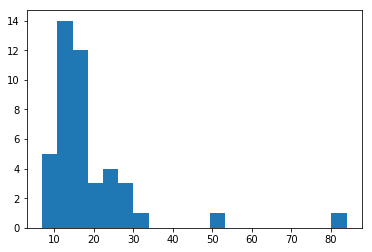

In [72]:
plt.hist(deadlines_df['total'], bins = 20)

In [73]:
deadlines_df['per_week'] = deadlines_df['total']/7

In [74]:
deadlines_df.set_index('uid',inplace = True)
deadlines_df.head()

,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,2013-04-05,...,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05,total,per_week
uid,,,,,,,,,,,,,,,,,,,,,
u01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,10,1.428571
u02,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,12,1.714286
u03,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,15,2.142857
u04,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,7,1.000000
u05,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,17,2.428571


some miscellaneous exploration
- observing deadlines by date rather by student

In [75]:
by_day_df = deadlines_df.drop(columns = ['total', 'per_week']).transpose()
by_day_df.head()

uid,u01,u02,u03,u04,u05,u07,u08,u09,u10,u12,...,u47,u49,u50,u51,u52,u53,u54,u57,u58,u59
2013-03-27,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0
2013-03-28,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2013-03-29,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,1
2013-03-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [76]:
from datetime import datetime

In [77]:
by_day_df.index = [datetime.strptime(i, '%Y-%m-%d') for i in by_day_df.index]

In [78]:
by_day_df['weekday'] = [i.weekday() for i in by_day_df.index]

In [79]:
by_day_df['total'] = np.sum(by_day_df.iloc[:,0:len(by_day_df.columns) - 1], axis = 1)
by_day_df.head()

uid,u01,u02,u03,u04,u05,u07,u08,u09,u10,u12,...,u50,u51,u52,u53,u54,u57,u58,u59,weekday,total
2013-03-27,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,3
2013-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
2013-03-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4,6
2013-03-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
2013-03-31,0,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,6,9


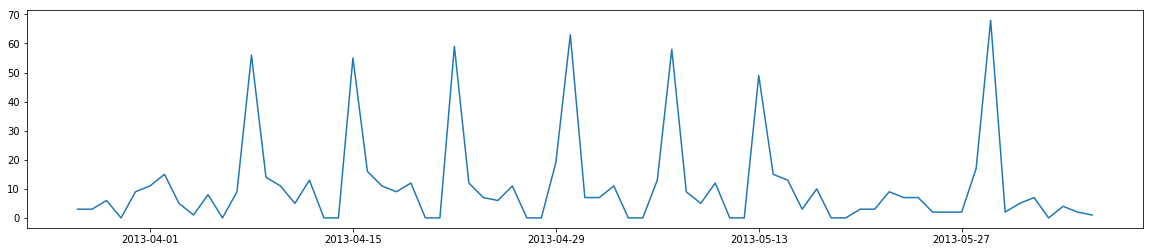

In [80]:
x = by_day_df.index
y = by_day_df['total']

plt.figure(figsize=(20,4))
plt.plot(x,y)

In [81]:
by_day_df.groupby('weekday').sum()

uid,u01,u02,u03,u04,u05,u07,u08,u09,u10,u12,...,u49,u50,u51,u52,u53,u54,u57,u58,u59,total
weekday,,,,,,,,,,,,,,,,,,,,,
0,4,4,6,4,5,10,6,4,4,6,...,23,10,4,4,4,6,10,4,17,271
1,3,7,2,2,7,7,6,2,7,9,...,11,2,5,7,2,2,2,2,8,215
2,3,1,4,1,2,3,3,1,4,8,...,20,3,2,1,1,11,3,1,4,144
3,0,0,0,0,0,0,2,0,0,1,...,11,0,0,1,0,0,0,0,7,48
4,0,0,2,0,1,0,1,0,0,1,...,19,0,0,0,0,11,0,0,16,95
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,9
6,0,0,1,0,2,0,0,0,2,2,...,0,0,0,2,0,0,0,0,0,20


seems monday was a big day for deadlines

moving on

## flourishing data

The Flourishing Scale is a brief 8-item summary measure of the respondent's self-perceived success in important areas such as relationships, self-esteem, purpose, and optimism. The scale provides a single psychological well-being score. - Ed Diener

In [82]:
flourishing_df.head()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me
0,u00,pre,7,6,5.0,6.0,6.0,7.0,7,4
1,u01,pre,4,6,6.0,6.0,7.0,6.0,4,6
2,u02,pre,6,7,5.0,6.0,5.0,6.0,4,7
3,u03,pre,6,2,2.0,4.0,5.0,6.0,5,4
4,u04,pre,3,5,4.0,3.0,2.0,2.0,3,5


In [83]:
flourishing_df['total'] = np.sum(flourishing_df.iloc[:, 2:10], axis = 1)

In [84]:
flour_tot = flourishing_df.iloc[:,[0,1,len(flourishing_df.columns)-1]]
flour_tot.head()
flour_tot.columns = ['uid', 'type', 'flour']
flour_tot.head()

,uid,type,flour
0,u00,pre,48.0
1,u01,pre,45.0
2,u02,pre,46.0
3,u03,pre,34.0
4,u04,pre,27.0


In [85]:
flour_pre = flourishing_df[flourishing_df['type'] == 'pre']
flour_post = flourishing_df[flourishing_df['type'] == 'post']

(array([ 2.,  0.,  0.,  1.,  4.,  3.,  7., 11., 12.,  6.]),
 array([15. , 18.9, 22.8, 26.7, 30.6, 34.5, 38.4, 42.3, 46.2, 50.1, 54. ]),
 <a list of 10 Patch objects>)

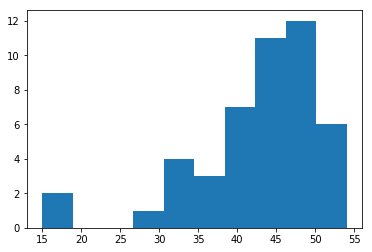

In [86]:
plt.hist(flour_pre['total'])

(array([1., 1., 0., 3., 1., 4., 6., 9., 7., 5.]),
 array([16., 20., 24., 28., 32., 36., 40., 44., 48., 52., 56.]),
 <a list of 10 Patch objects>)

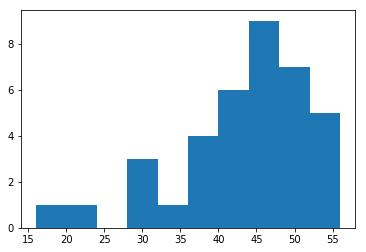

In [87]:
plt.hist(flour_post['total'])

## Stress dataset

this will be an important set to analyze, since it will ultimately become our predicted variable in our regression model

In [88]:
stress_df.head(10)

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,2,2,3,1,2,4,2,2,3,3
1,u01,pre,2,2,2,2,1,2,1,1,1,1
2,u02,pre,3,2,2,1,3,2,3,2,2,1
3,u03,pre,2,1,2,3,2,0,3,4,0,0
4,u04,pre,1,1,3,2,2,3,2,3,2,2
5,u05,pre,1,2,1,0,0,1,1,0,1,0
6,u07,pre,2,1,3,0,0,1,1,1,2,1
7,u08,pre,2,3,4,2,2,2,1,2,2,3
8,u09,pre,1,1,2,2,1,1,1,2,1,1
9,u10,pre,3,3,3,1,1,2,3,0,3,1


In [89]:
stress_df['total'] = np.sum(stress_df.iloc[:,2:len(stress_df.columns)], axis = 1)
stress_tot = stress_df.iloc[:,[0,1,len(stress_df.columns) - 1]]
stress_tot.columns = ['uid', 'type', 'stress']
stress_tot.head()

,uid,type,stress
0,u00,pre,24
1,u01,pre,15
2,u02,pre,21
3,u03,pre,17
4,u04,pre,21


In [90]:
stress_pre = stress_df[stress_df['type'] == 'pre']
stress_post = stress_df[stress_df['type'] == 'post']

(array([1., 2., 5., 8., 3., 9., 8., 5., 2., 3.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33.]),
 <a list of 10 Patch objects>)

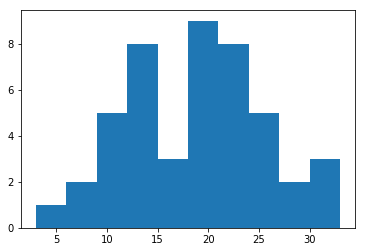

In [91]:
plt.hist(stress_pre['total'])

(array([4., 3., 8., 4., 5., 4., 3., 4., 2., 2.]),
 array([ 7. ,  9.7, 12.4, 15.1, 17.8, 20.5, 23.2, 25.9, 28.6, 31.3, 34. ]),
 <a list of 10 Patch objects>)

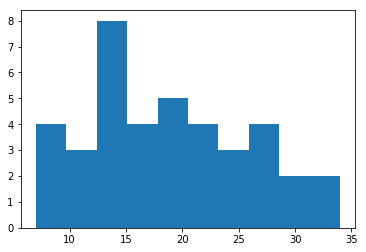

In [92]:
plt.hist(stress_post['total'])

## Grades

In [93]:
grades_df.head()

,uid,gpa all,gpa 13s,cs 65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


In [94]:
grades_df.columns

Index(['uid', ' gpa all', ' gpa 13s', ' cs 65'], dtype='object')

(array([1., 0., 4., 1., 1., 2., 6., 3., 7., 5.]),
 array([2.4   , 2.5547, 2.7094, 2.8641, 3.0188, 3.1735, 3.3282, 3.4829,
        3.6376, 3.7923, 3.947 ]),
 <a list of 10 Patch objects>)

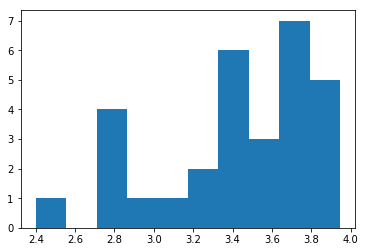

In [95]:
plt.hist(grades_df[' gpa all'])

(array([ 2.,  0.,  1.,  0.,  0.,  3.,  0.,  7.,  3., 14.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

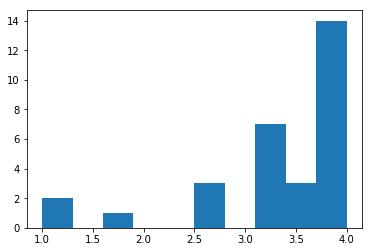

In [96]:
plt.hist(grades_df[' gpa 13s'])

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  3., 23.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

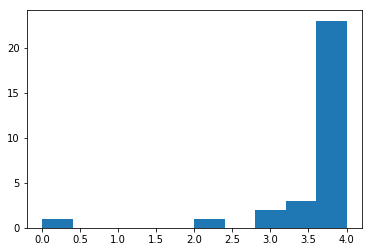

In [97]:
plt.hist(grades_df[' cs 65'])

## Loneliness

In [98]:
loneliness_df.head()

,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to,Total Score
0,u00,pre,1,1,0,3,0,1,0,0,...,1,0,0,0,2,3,2,0,0,15
1,u01,pre,1,1,1,1,0,0,0,0,...,1,0,1,0,0,2,0,0,0,10
2,u02,pre,1,1,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,9
3,u03,pre,1,1,0,0,2,2,2,2,...,1,2,2,1,0,2,2,1,1,27
4,u04,pre,1,2,2,1,2,1,0,1,...,2,2,2,2,2,2,2,2,2,33


In [99]:
lonely_tot = loneliness_df.iloc[:, [0,1, len(loneliness_df.columns) - 1]]
lonely_tot.columns = ['uid', 'type', 'lonely']

In [100]:
lonely_tot.head()

,uid,type,lonely
0,u00,pre,15
1,u01,pre,10
2,u02,pre,9
3,u03,pre,27
4,u04,pre,33


(array([13.,  8., 11., 14., 11.,  6.,  8.,  6.,  1.,  5.]),
 array([ 2. ,  6.3, 10.6, 14.9, 19.2, 23.5, 27.8, 32.1, 36.4, 40.7, 45. ]),
 <a list of 10 Patch objects>)

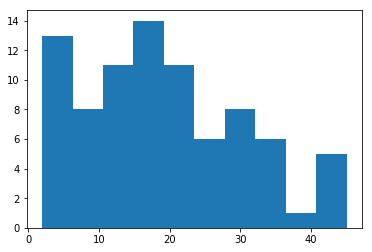

In [101]:
plt.hist(loneliness_df['Total Score'])

In [102]:
np.mean(loneliness_df['Total Score'])

19.180722891566266

In [103]:
np.std(loneliness_df['Total Score'])

11.37122194990733

exploring each data set individually seems to yield somewhat insightful findings, but feels inefficient. So at this point I will merge all of our 9 feature data sets and see if there exists any interesting relationships between our features and our stress metric.

# Merging Tables

In [104]:
loneliness_df.head()

,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to,Total Score
0,u00,pre,1,1,0,3,0,1,0,0,...,1,0,0,0,2,3,2,0,0,15
1,u01,pre,1,1,1,1,0,0,0,0,...,1,0,1,0,0,2,0,0,0,10
2,u02,pre,1,1,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,9
3,u03,pre,1,1,0,0,2,2,2,2,...,1,2,2,1,0,2,2,1,1,27
4,u04,pre,1,2,2,1,2,1,0,1,...,2,2,2,2,2,2,2,2,2,33


In [105]:
stress_df.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",total
0,u00,pre,2,2,3,1,2,4,2,2,3,3,24
1,u01,pre,2,2,2,2,1,2,1,1,1,1,15
2,u02,pre,3,2,2,1,3,2,3,2,2,1,21
3,u03,pre,2,1,2,3,2,0,3,4,0,0,17
4,u04,pre,1,1,3,2,2,3,2,3,2,2,21


In [106]:
new_stress = stress_df[['uid', 'type', 'total']]

In [107]:
new_stress.head()

,uid,type,total
0,u00,pre,24
1,u01,pre,15
2,u02,pre,21
3,u03,pre,17
4,u04,pre,21


In [108]:
survey_sets = [loneliness_df, panas_df, phq_9, vr_12_df, big_5_df, new_stress]

merging all of our survey data into single datset titled 'all_survey'

In [109]:
all_survey = flourishing_df

for i in survey_sets:
    all_survey = all_survey.merge(i, how = 'outer', on = ['uid', 'type'])

In [110]:
all_survey.head()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me,...,"I see myself as someone who... - 36. Is outgoing, sociable",I see myself as someone who... - 37. Is sometimes rude to others,I see myself as someone who... - 38. Makes plans and follows through with them,I see myself as someone who... - 39. Gets nervous easily,"I see myself as someone who... - 40. Likes to reflect, play with ideas",I see myself as someone who... - 41. Has few artistic interests,I see myself as someone who... - 42. Likes to cooperate with others,I see myself as someone who... - 43. Is easily distracted,"I see myself as someone who... - 44. Is sophisticated in art, music, or literature",total_y
0,u00,pre,7.0,6.0,5.0,6.0,6.0,7.0,7.0,4.0,...,5.0,5.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,24.0
1,u01,pre,4.0,6.0,6.0,6.0,7.0,6.0,4.0,6.0,...,3.0,2.0,4.0,2.0,5.0,2.0,3.0,2.0,4.0,15.0
2,u02,pre,6.0,7.0,5.0,6.0,5.0,6.0,4.0,7.0,...,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,21.0
3,u03,pre,6.0,2.0,2.0,4.0,5.0,6.0,5.0,4.0,...,2.0,2.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,17.0
4,u04,pre,3.0,5.0,4.0,3.0,2.0,2.0,3.0,5.0,...,2.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,3.0,21.0


**Lets consider adding non-survey data to all_survey**
- make sure to assign same value for same uid

### train test split

In [484]:
from sklearn.model_selection import train_test_split

In [496]:
train, test = train_test_split(all_survey, train_size = .9, test_size = .1)

In [497]:
train = train[~train['total_y'].isna()]
test = test[~test['total_y'].isna()]

In [498]:
train_feat = train.iloc[:, 2:len(train.columns)-1]
train_feat = train_feat.fillna(train_feat.median()).values
train_lab = train['total_y'].values

In [499]:
from sklearn.preprocessing import normalize

In [500]:
train_feat = normalize(train_feat, axis = 1)

test_feat = test.iloc[:, 2:len(test.columns)-1]
test_feat = test_feat.fillna(test_feat.median()).values
test_lab = test['total_y'].values

test_feat = normalize(test_feat, axis = 1)

### creating linear reg model

In [501]:
from sklearn.metrics import mean_absolute_error
model = sklearn.linear_model.LinearRegression()
model.fit(train_feat, train_lab)
predictions = model.predict(test_feat)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(test_lab, predictions)))
print('MAE: ' + str(mean_absolute_error(test_lab, predictions)))

MSE: 43.082648839908494
MAE: 6.1498874287957195


Pretty bad

- Lets minimize the data we are using
- Instead of using all of our survey columns lets just take the final output scores for pre and post

In [502]:
def group_into_bins1(lst):
    new_lst = []
    for item in lst:
        if item > 0 and item <= 6.8:
            new_lst.append(1)
        elif item > 6.8 and item <= 2*6.8:
            new_lst.append(2)
        elif item > 2*6.8 and item <= 3*6.8:
            new_lst.append(3)
        elif item > 3*6.8 and item <= 4*6.8:
            new_lst.append(4)
        elif item > 4*6.8 and item <= 5*6.8:
            new_lst.append(5)
        else:
            new_lst.append(6)
    return new_lst
        
stress_category_train1 = group_into_bins1(train_lab)

In [503]:
test_feat

array([[0.0568191 , 0.0568191 , 0.0568191 , ..., 0.1136382 , 0.0568191 ,
        0.1136382 ],
       [0.04600708, 0.03067138, 0.03067138, ..., 0.06134277, 0.07667846,
        0.07667846],
       [0.09002071, 0.07201657, 0.09002071, ..., 0.07201657, 0.07201657,
        0.05401242],
       ...,
       [0.08938315, 0.07448596, 0.07448596, ..., 0.07448596, 0.05958877,
        0.07448596],
       [0.09674903, 0.09674903, 0.09674903, ..., 0.06449935, 0.06449935,
        0.04837451],
       [0.10740037, 0.10740037, 0.10740037, ..., 0.06137164, 0.06137164,
        0.04602873]])

In [504]:
logReg1 = sklearn.linear_model.LogisticRegression()
logReg1.fit(train_feat, stress_category_train1)
preds = logReg1.predict(test_feat)
true_values1 = group_into_bins1(test_lab)
preds - true_values1


array([ 0, -1, -2, -1,  0, -1,  0,  0,  1])

In [505]:
print(preds)
print(true_values1)

[3 4 3 3 3 3 4 3 3]
[3, 5, 5, 4, 3, 4, 4, 3, 2]


In [506]:
acc = sum(preds == true_values1) / len(preds)
print("Accuracy: " + str(acc))

Accuracy: 0.4444444444444444


## Reducing Features

lets filter first and then aggregate the data

In [118]:
os.listdir(path.dirname(os.getcwd()) + '/clean_data')

['f_scale_total.csv',
 'vr_12_CLEAN.csv',
 'perceived_stress_CLEAN.csv',
 'piazza_CLEAN.csv',
 'big_five_CLEAN.csv',
 'vr_scores.csv',
 '.DS_Store',
 'loneliness_scale_CLEAN.csv',
 'psqi_CLEAN.csv',
 'grades_CLEAN.csv',
 'big_five_scores_CLEAN.csv',
 'panas_CLEAN.csv',
 'deadlines_CLEAN.csv',
 'phq_9_tot.csv',
 'flourishing_scale_CLEAN.csv',
 'phq_9_CLEAN.csv']

In [119]:
clean_path = path.dirname(os.getcwd()) + '/clean_data/'

In [120]:
vr_score = pd.read_csv(clean_path + 'vr_scores.csv', index_col = 0)
vr_score.head()

,uid,type,vr_12_phys,vr_12_ment
0,u00,pre,20.0,15
1,u01,pre,21.0,17
2,u02,pre,17.0,22
3,u03,pre,20.0,19
4,u04,pre,20.0,21


In [121]:
big_five_score = pd.read_csv(clean_path + 'big_five_scores_CLEAN.csv')
big_five_score.head()

,uid,type,E,A,C,N,O
0,u00,pre,3.750,2.888889,3.000000,3.125,4.5
1,u01,pre,3.125,3.777778,4.444444,2.750,3.9
2,u02,pre,2.125,3.000000,4.222222,3.500,3.2
3,u03,pre,2.125,3.222222,3.888889,3.375,2.7
4,u04,pre,2.375,3.111111,2.666667,4.125,2.9


In [122]:
big_five_score.columns = ['uid', 'type', 'Extraversion', 'Agreeableness', 
                          'Conscientiousness', 'Neuroticism', 'Openness']
big_five_score.head()

,uid,type,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,u00,pre,3.750,2.888889,3.000000,3.125,4.5
1,u01,pre,3.125,3.777778,4.444444,2.750,3.9
2,u02,pre,2.125,3.000000,4.222222,3.500,3.2
3,u03,pre,2.125,3.222222,3.888889,3.375,2.7
4,u04,pre,2.375,3.111111,2.666667,4.125,2.9


In [123]:
flour_tot.head()

,uid,type,flour
0,u00,pre,48.0
1,u01,pre,45.0
2,u02,pre,46.0
3,u03,pre,34.0
4,u04,pre,27.0


In [124]:
lonely_tot.head()

,uid,type,lonely
0,u00,pre,15
1,u01,pre,10
2,u02,pre,9
3,u03,pre,27
4,u04,pre,33


In [125]:
panas_df.head()

,uid,type,Interested,Distressed,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid
0,u00,pre,5,4,3,4,3.0,5,5,3,3,3,4,4.0,3.0,4,3.0,2.0,2,5
1,u01,pre,4,2,2,2,5.0,1,1,3,3,2,4,3.0,3.0,4,3.0,2.0,4,1
2,u02,pre,4,1,1,2,2.0,2,1,3,2,2,3,2.0,2.0,2,3.0,3.0,2,1
3,u03,pre,4,2,2,4,5.0,5,5,3,1,1,5,3.0,1.0,3,3.0,5.0,4,1
4,u04,pre,4,2,1,3,3.0,1,1,3,3,2,3,1.0,2.0,3,3.0,1.0,4,1


In [126]:
stress_tot.head()

,uid,type,stress
0,u00,pre,24
1,u01,pre,15
2,u02,pre,21
3,u03,pre,17
4,u04,pre,21


In [127]:
phq_9_tot = pd.read_csv(clean_path + 'phq_9_tot.csv', index_col = 0)
phq_9_tot.head()

,uid,type,phq_total
0,u00,pre,2
1,u01,pre,5
2,u02,pre,13
3,u03,pre,2
4,u04,pre,6


In [128]:
red_survey = flour_tot

for i in [lonely_tot, panas_df, phq_9_tot, vr_score, big_five_score, stress_tot]:
    red_survey = red_survey.merge(i, how = 'outer', on = ['uid', 'type'])

In [129]:
red_survey.shape

(87, 31)

In [130]:
pivot_survey = red_survey.pivot(index = 'uid', columns = 'type')
pivot_survey.head()

flour       lonely       Interested      Distressed      Upset       \
type  post   pre   post   pre       post  pre       post  pre  post  pre   
uid                                                                        
u00   45.0  48.0   17.0  15.0        4.0  5.0        3.0  4.0   3.0  3.0   
u01   46.0  45.0   15.0  10.0        3.0  4.0        2.0  2.0   2.0  2.0   
u02   44.0  46.0    5.0   9.0        4.0  4.0        2.0  1.0   2.0  1.0   
u03   31.0  34.0   29.0  27.0        4.0  4.0        3.0  2.0   2.0  2.0   
u04   33.0  27.0   30.0  33.0        3.0  4.0        2.0  2.0   2.0  1.0   

      ...  Agreeableness           Conscientiousness           Neuroticism  \
type  ...           post       pre              post       pre        post   
uid   ...                                                                    
u00   ...       3.555556  2.888889          2.888889  3.000000       3.000   
u01   ...       3.777778  3.777778          4.222222  4.444444       2.875   
u02   ...       3.000000  3.000000          3.888889  4.222222       3.250   
u03   ...       2.888889  3.222222          3.888889  3.888889       3.000   
u04   ...       3.000000  3.111111          2.666667  2.666667       4.625   

            Openness      stress        
type    pre     post  pre   post   pre  
uid                                     
u00   3.125      4.6  4.5   15.0  24.0  
u01   2.750      3.7  3.9   16.0  15.0  
u02   3.500      3.0  3.2   25.0  21.0  
u03   3.375      2.7  2.7   24.0  17.0  
u04   4.125      3.1  2.9   17.0  21.0  

[5 rows x 58 columns]

beautiful

lets plot a correlation matrix

In [145]:
corr = pivot_survey.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Observing the strongest correlation values for each pre-stress and post stress

In [146]:
post_corr = corr['stress'][['post']].sort_values(by = ['post'])

In [147]:
bottom6_post = post_corr.head(6).reset_index().iloc[:,0:3]
bottom6_post

type,level_0,type,post
0,vr_12_ment,post,-0.765781
1,Interested,post,-0.520546
2,Active,post,-0.507939
3,Alert,post,-0.434042
4,flour,pre,-0.411800
5,Conscientiousness,post,-0.387363


In [148]:
top_post_neg = bottom6_post.iloc[:,0]
top_post_neg.astype('str')

0           vr_12_ment
1           Interested
2              Active 
3                Alert
4                flour
5    Conscientiousness
Name: level_0, dtype: object

In [149]:
post_corr.tail(6).reset_index().iloc[:,0:3]

type,level_0,type,post
0,Upset,post,0.541151
1,Neuroticism,post,0.581124
2,phq_total,post,0.632501
3,stress,pre,0.634861
4,phq_total,pre,0.699325
5,stress,post,1.000000


In [150]:
pre_corr = corr['stress'][['pre']].sort_values(by = ['pre'])

In [151]:
pre_corr.head(7).reset_index().iloc[:,0:3]

type,level_0,type,pre
0,vr_12_ment,pre,-0.750725
1,vr_12_ment,post,-0.606853
2,flour,pre,-0.535198
3,vr_12_phys,post,-0.511853
4,flour,post,-0.484323
5,Conscientiousness,post,-0.475520
6,Conscientiousness,pre,-0.457325


In [152]:
pre_corr.tail(8).reset_index().iloc[:,0:3]

type,level_0,type,pre
0,Nervous,post,0.609437
1,stress,post,0.634861
2,Hostile,post,0.636626
3,phq_total,pre,0.648088
4,Neuroticism,pre,0.658690
5,phq_total,post,0.659384
6,Neuroticism,post,0.689304
7,stress,pre,1.000000


### Prediction (Round 2)

In [322]:
red_survey.columns

Index(['uid', 'type', 'flour', 'lonely', 'Interested', 'Distressed', 'Upset',
       'Strong', 'Guilty', 'Scared', 'Hostile ', 'Enthusiastic', 'Proud',
       'Irritable', 'Alert', 'Inspired', 'Nervous', 'Determined ', 'Attentive',
       'Jittery', 'Active ', 'Afraid ', 'phq_total', 'vr_12_phys',
       'vr_12_ment', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'stress'],
      dtype='object')

In [323]:
filtered_df = red_survey.loc[:, ['vr_12_ment', 'flour', 'vr_12_phys', 'Conscientiousness', 'Active ',
                                 'Alert', 'Neuroticism', 'Upset', 'Nervous', 'phq_total', 'Hostile ',
                                 'stress']]

In [324]:
filtered_df = filtered_df.fillna(filtered_df.mean())

In [325]:
filtered_df.head()

,vr_12_ment,flour,vr_12_phys,Conscientiousness,Active,Alert,Neuroticism,Upset,Nervous,phq_total,Hostile,stress
0,15.0,48.0,20.0,3.000000,2.0,4.0,3.125,3.0,3.0,2.0,5.0,24.0
1,17.0,45.0,21.0,4.444444,4.0,4.0,2.750,2.0,3.0,5.0,1.0,15.0
2,22.0,46.0,17.0,4.222222,2.0,3.0,3.500,1.0,2.0,13.0,1.0,21.0
3,19.0,34.0,20.0,3.888889,4.0,5.0,3.375,2.0,1.0,2.0,5.0,17.0
4,21.0,27.0,20.0,2.666667,4.0,3.0,4.125,1.0,2.0,6.0,1.0,21.0


In [326]:
train2, val2 = train_test_split(filtered_df, train_size = .8, test_size = .2)

In [327]:
train_feat2 = train2.iloc[:,:len(train2.columns)-1].values
train_lab2 = train2['stress'].values

In [328]:
val_feat2 = val2.iloc[:,:len(val2.columns)-1].values
val_lab2 = val2['stress'].values

In [329]:
mod2 = sklearn.linear_model.LinearRegression(normalize = True)
mod2.fit(train_feat2, train_lab2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [330]:
from sklearn.metrics import mean_absolute_error

In [331]:
preds2 = mod2.predict(val_feat2)
print('MSE: ' + str(mean_squared_error(val_lab2, preds2)))
print('MAE: ' + str(mean_absolute_error(val_lab2, preds2)))

MSE: 18.044132869905212
MAE: 3.5689156980090786


In [332]:
(preds2 - val_lab2)

array([ 0.58104885, -3.37547938,  7.22246689, -5.07298588, -2.1886756 ,
        5.45015193, -2.31886193,  2.2011942 , -5.76727939, -2.3545923 ,
        2.67415561, -3.15365107,  0.89063375, -8.88696807, -1.22437235,
        5.64993092, -0.65363246, -4.57440198])

### Turn into Classification Problem

In [333]:
max(train2['stress'])

34.0

Going to be grouping stress levels into buckets and running a classification problem on 

In [334]:
train_lab2

array([14.        , 23.        , 16.        , 17.        , 15.        ,
       14.        , 14.        ,  8.        , 31.        , 14.        ,
       21.        , 24.        , 17.        , 24.        , 18.        ,
       20.        , 18.        , 19.        , 20.        , 14.        ,
       29.        , 21.        , 11.        , 18.51764706, 28.        ,
       18.        ,  3.        , 25.        ,  8.        , 23.        ,
       12.        , 20.        ,  7.        , 17.        , 18.51764706,
        9.        , 20.        , 15.        , 27.        , 18.        ,
       34.        ,  7.        , 16.        , 24.        , 12.        ,
        6.        , 13.        , 23.        , 25.        , 27.        ,
       15.        , 13.        , 33.        , 24.        , 13.        ,
       30.        , 16.        , 26.        , 33.        , 11.        ,
       24.        , 20.        , 33.        , 12.        , 14.        ,
       12.        , 15.        , 11.        , 22.        ])

In [335]:
def group_into_bins(lst):
    new_lst = []
    for item in lst:
        if item > 0 and item < 6.8:
            new_lst.append(1)
        if item > 6.8 and item < 2*6.8:
            new_lst.append(2)
        if item > 2*6.8 and item < 3*6.8:
            new_lst.append(3)
        if item > 3*6.8 and item < 4*6.8:
            new_lst.append(4)
        if item > 4*6.8 and item <= 5*6.8:
            new_lst.append(5)
    return new_lst
        
stress_category_train = group_into_bins(train_lab2)
        

In [336]:
logReg = sklearn.linear_model.LogisticRegression()
logReg.fit(train_feat2, stress_category_train)
preds = logReg.predict(val_feat2)
true_values = group_into_bins(val_lab2)
preds

array([3, 3, 3, 3, 3, 5, 2, 2, 5, 3, 2, 3, 3, 4, 3, 2, 3, 3])

In [337]:
true_values

[3, 4, 3, 3, 4, 4, 3, 2, 5, 4, 2, 4, 3, 4, 4, 2, 3, 4]

In [338]:
preds - true_values

array([ 0, -1,  0,  0, -1,  1, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,
       -1])

In [339]:
acc = sum(preds == true_values) / len(preds)
print("Accuracy: " + str(acc))


Accuracy: 0.5555555555555556


We were able to get a 

In [321]:
output = preds - true_values
for item in output:
    print(item)

0
0
-1
-1
1
0
0
0
2
-1
-1
-1
0
0
0
0
-1
-1
